In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns

In [2]:
dataset_demanda = pd.read_csv(r'C:\Users\CC38501953\Desktop\Mentoria DiploDatos\Dataset_demanda.csv', sep=';')
dataset_demanda.loc[:, 'Promedio calificaciones enviadas'] = dataset_demanda.loc[:, 'Promedio calificaciones enviadas'].str.replace(',','.').astype(float)
dataset_demanda

id_socio_encoded  edad_encoded sexo_encoded  antiguedad_encoded  \
0               100000            81            F                  69   
1               100001            64            F                  77   
2               100002            60            F                  76   
3               100003            49            F                  78   
4               100004            48            M                  66   
...                ...           ...          ...                 ...   
1919            101919            23            M                   7   
1920            101920            22            M                  22   
1921            101921            11            M                  22   
1922            101922            41            F                  29   
1923            101923            20            F                  29   

     parentesco_encoded plan_encoded  segmento_encoded app_descargada_encoded  \
0               Titular            a  individuo_tipo_1                     SI   
1               Titular            b    empresa_tipo_1                     SI   
2                  Otro            b    empresa_tipo_1                     NO   
3               Titular            c    empresa_tipo_1                     SI   
4                  Otro            a  individuo_tipo_1                     SI   
...                 ...          ...               ...                    ...   
1919               Otro            b  individuo_tipo_1                     SI   
1920               Otro            b  individuo_tipo_2                     SI   
1921            Titular            b  individuo_tipo_3                     SI   
1922            Titular            b  individuo_tipo_1                     SI   
1923            Titular            b  individuo_tipo_1                     SI   

      Q consumos Clinica Medica  Q consumos pediatria  \
0                             2                     0   
1                             1                     0   
2                             1                     0   
3                             1                     0   
4                             1                     0   
...                         ...                   ...   
1919                          1                     0   
1920                          0                     0   
1921                          0                     0   
1922                          0                     0   
1923                          0                     0   

      Q consumos nutricionistas  Promedio calificaciones enviadas  
0                             0                              6.50  
1                             0                              8.00  
2                             0                              7.00  
3                             0                              9.00  
4                             0                              3.00  
...                         ...                               ...  
1919                          0                             10.00  
1920                          2                              9.00  
1921                          1                             10.00  
1922                          4                              8.25  
1923                          1                             10.00  

[1924 rows x 12 columns]

In [3]:
dataset_oferta = pd.read_csv(r'C:\Users\CC38501953\Desktop\Mentoria DiploDatos\Dataset_oferta.csv', sep=';')
dataset_oferta.loc[:, 'Promedio calificacion recibida'] = dataset_oferta.loc[:, 'Promedio calificacion recibida'].str.replace(',','.').astype(float)
dataset_oferta

id_prestador_encoded especialidad_prestador_encoded  \
0                  200030                 CLINICA MEDICA   
1                  200123                 CLINICA MEDICA   
2                  200133                 CLINICA MEDICA   
3                  200137                 CLINICA MEDICA   
4                  200167                 CLINICA MEDICA   
..                    ...                            ...   
191                200067                      PEDIATRIA   
192                200017                      PEDIATRIA   
193                200088                      PEDIATRIA   
194                200110                      PEDIATRIA   
195                200056                      PEDIATRIA   

    descripcion_practica_encoded  Q consumos  Promedio calificacion recibida  
0       ATENCION ON LINE COVID19           1                        2.000000  
1       ATENCION ON LINE COVID19           1                        3.000000  
2       ATENCION ON LINE COVID19           1                        3.000000  
3       ATENCION ON LINE COVID19           1                        2.000000  
4       ATENCION ON LINE COVID19           1                        1.000000  
..                           ...         ...                             ...  
191     ATENCION ON LINE COVID19          28                        9.107143  
192     ATENCION ON LINE COVID19          29                        9.206897  
193     ATENCION ON LINE COVID19          35                        9.028571  
194     ATENCION ON LINE COVID19          37                        9.108108  
195     ATENCION ON LINE COVID19          40                        9.100000  

[196 rows x 5 columns]

In [4]:
pandas_profiling.ProfileReport(dataset_demanda)

Conclusiones exploracion inicial dataset demanda:

Edad y antiguedad muestran una correlacion positiva.

Edad y consumos clinica medica muestran una correlacion positiva.

Edad y consumos pediatria muestran una correlacion negativa.

Edad y consumos nutricionistas no muestran correlacion.


In [5]:
pandas_profiling.ProfileReport(dataset_oferta)

Conclusiones exploracion inicial dataset oferta:

Existen tres tipos de prestadores: prestadores con calificacion baja, prestadores con calificacion media y prestadores con calificacion alta.

Se observa una correlacion positiva entre el nivel de consultas que muestran los prestadores y la calificacion recibida, lo cual permite inferir que en general los buenos prestadores son mas consultados.

Del grafico de dispersion que relaciona el nivel de consultas y la calificacion de cada prestador, se pueden apreciar distintos perfiles (clusters) de prestadores.

Un buen modelo de recomendacion de prestadores deberia generar un impacto positivo en las calificaciones enviadas por los pacientes (mayor satisfaccion en la demanda) y reducir el nivel de consultas en prestadores con calificacion baja (mayor satisfaccion en los prestadores que ofrecen un buen servicio)

El desafio principal es redirigir la demanda del cluster de prestadores con alta demanda y calificacion media y baja a aquellos con calificacion alta y media.

Para lograr un buen modelo de recomendacion tendremos que definir clusters de pacientes y clusters de prestadores para entender que tipos de pacientes eligen que tipos de prestadores y redirigir a cada uno para elevar el nivel de satisfaccion de la demanda, teniendo en cuenta que no todos los tipos de pacientes encontraran el mismo nivel de satisfaccion en cada tipo de prestador.

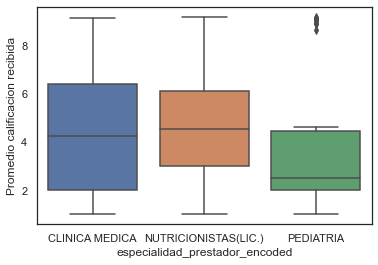

In [6]:
sns.set(style="white")

sns.boxplot(x='especialidad_prestador_encoded', y='Promedio calificacion recibida', data=dataset_oferta) #, palette='Blues_r')

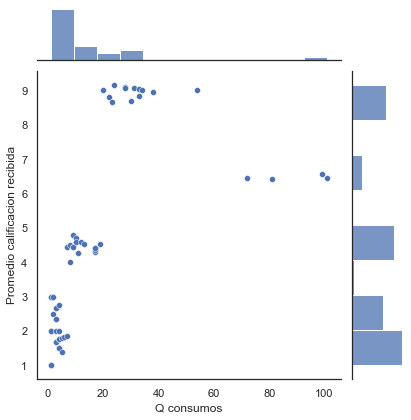

In [7]:
sns.jointplot(data=dataset_oferta.loc[dataset_oferta['especialidad_prestador_encoded'] == 'CLINICA MEDICA', :], x='Q consumos', y='Promedio calificacion recibida')

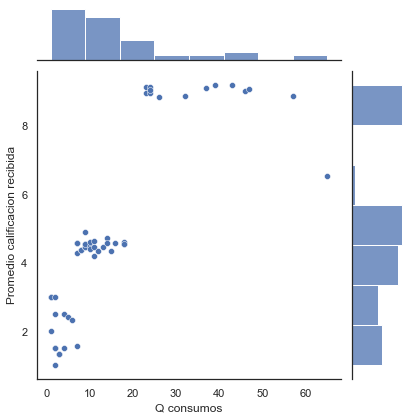

In [8]:
sns.jointplot(data=dataset_oferta.loc[dataset_oferta['especialidad_prestador_encoded'] == 'NUTRICIONISTAS(LIC.)', :], x='Q consumos', y='Promedio calificacion recibida')

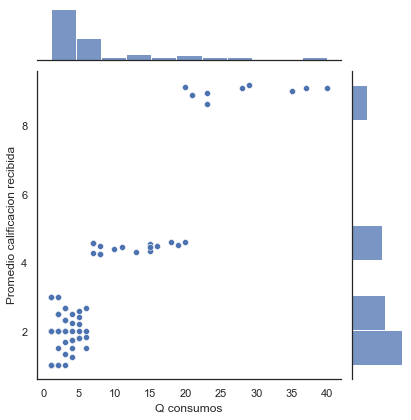

In [9]:
sns.jointplot(data=dataset_oferta.loc[dataset_oferta['especialidad_prestador_encoded'] == 'PEDIATRIA', :], x='Q consumos', y='Promedio calificacion recibida')